### In this version of the hexagon spec models, I included a scale factor in the training data, which changes the spacing used in the simulations.

In [14]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [17]:
#Load the training data

#energy = (pd.read_csv('HexagonBias_v3.csv', header=None)*1000).round().astype(int)
energy = (pd.read_csv('HexagonBias_v4.csv', header=None)*1000).round().astype(int)

energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]

col_names = ['deltaI', 'deltaR', 'scale_factor']+ energy_names

#data = pd.read_csv('HexagonTrainingData052818_specPoints.csv', header = None, names = col_names)
#data = pd.read_csv('HexagonTrainingData060518_v3.csv', header = None, names = col_names)
data = pd.read_csv('HexagonTrainingData060518_v4.csv', header = None, names = col_names)


data.head()

X = data.drop(['deltaI', 'deltaR','scale_factor'], axis = 1)
Y = data[['deltaI', 'deltaR', 'scale_factor']]

ts1 = 0.3
rs1 = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1 )
data.head()

,deltaI,deltaR,scale_factor,E_-400_mV,E_-398_mV,E_-396_mV,E_-394_mV,E_-392_mV,E_-390_mV,E_-388_mV,...,E_482_mV,E_484_mV,E_486_mV,E_488_mV,E_490_mV,E_492_mV,E_494_mV,E_496_mV,E_498_mV,E_500_mV
0,0.81472,-0.14798,0.92540,0.162570,0.151630,0.144180,0.139540,0.137140,0.13665,0.13798,...,1.19620,1.15800,1.12230,1.08920,1.05910,1.03080,1.00580,0.98332,0.96349,0.94655
1,0.91338,-0.57749,0.91951,0.129820,0.120550,0.114190,0.110230,0.108000,0.10734,0.10803,...,1.46230,1.39400,1.32840,1.26580,1.20730,1.15290,1.10220,1.05670,1.01530,0.97832
2,0.27850,-0.71176,1.09150,0.060791,0.065315,0.071834,0.080522,0.092597,0.10939,0.13261,...,0.78962,0.82008,0.86019,0.90906,0.96941,1.04080,1.12380,1.21730,1.32090,1.42990
3,0.96489,-1.32320,1.09410,0.092516,0.098116,0.106220,0.117390,0.132910,0.15339,0.18192,...,0.95044,0.92788,0.91157,0.90112,0.89638,0.89736,0.90418,0.91637,0.93454,0.95788
4,0.95717,-0.80837,1.06010,0.098679,0.101980,0.107370,0.115320,0.126210,0.14079,0.16022,...,1.34080,1.38030,1.42140,1.46150,1.50000,1.53280,1.55750,1.57210,1.57540,1.56660


## Using the Best Models on the Hexagon Data

### Statsmodels

 
RMSE on test data: 2.890027951815111 for  Delta I
R^2 Score on test data: -101.28501439808423 for Delta I
 
RMSE on test data: 5.88853305594446 for  Delta R
R^2 Score on test data: -166.6511859743473 for Delta R
 
RMSE on test data: 5.88853305594446 for  Delta R Zoomed In
R^2 Score on test data: -166.6511859743473 for Delta R Zoomed In
 
RMSE on test data: 0.08674813687291745 for  Scale Factor
R^2 Score on test data: -1.2525253635472762 for Scale Factor
The average residual for predict: 0.3099
Residual is this percent of predict range 0.16 %
The average residual for predict: 0.4773
Residual is this percent of predict range 0.131 %
The average residual for predict: 0.0067
Residual is this percent of predict range 0.118 %


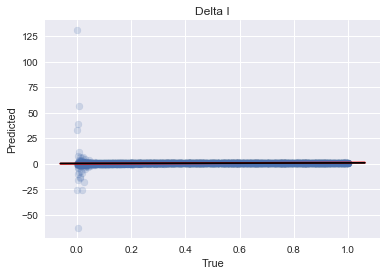

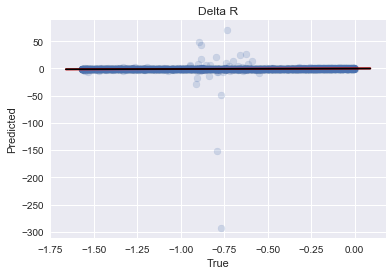

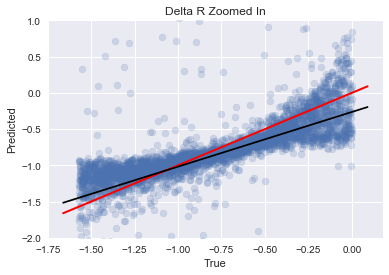

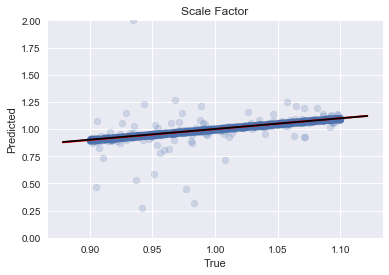

In [18]:
#Initialize and fit OLS model for deltaI 
model_OLS_I = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R = sm.OLS(Y_train['deltaR'], X_train)
model_OLS_sf = sm.OLS(Y_train['scale_factor'], X_train)

results_OLS_I = model_OLS_I.fit()
results_OLS_R = model_OLS_R.fit()
results_OLS_sf = model_OLS_sf.fit()

#Make predictions on testing data
predictions_OLS_I = results_OLS_I.predict(X_test) # make the predictions by the model
predictions_OLS_R = results_OLS_R.predict(X_test)
predictions_OLS_sf = results_OLS_sf.predict(X_test)

#print(results_OLS_I.summary())
#print(results_OLS_R.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I,'Delta I')
#ylim([-1,5])
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R')
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R Zoomed In')
ylim([-2,1])
plotSummary(Y_test['scale_factor'], predictions_OLS_sf, 'Scale Factor')
ylim([0,2])


myResiduals(Y_test['deltaI'], predictions_OLS_I)
myResiduals(Y_test['deltaR'], predictions_OLS_R)
myResiduals(Y_test['scale_factor'], predictions_OLS_sf)

### Decision Tree

 
RMSE on test data: 0.13420939458880124 for  deltaI Depth 30
R^2 Score on test data: 0.7794161264658503 for deltaI Depth 30
 
RMSE on test data: 0.19939970759410197 for  deltaR Depth 30
R^2 Score on test data: 0.8077610306102069 for deltaR Depth 30
 
RMSE on test data: 0.016580189707947952 for  scale factor - DT
R^2 Score on test data: 0.9177135420180373 for scale factor - DT
 
Regression - Decision Tree -  Score:  0.8010884527623255 , using max depth of 30
 
Cross Validation Scores for regressor with max depth of  30  :  [0.82414052 0.83750141 0.83135469 0.82932225 0.84344717 0.8322434
 0.81193488 0.83373576 0.82442025 0.7923106 ]


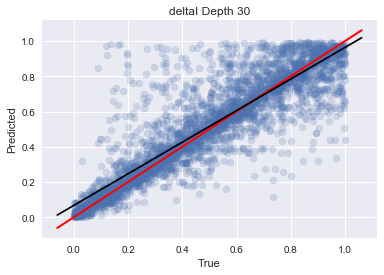

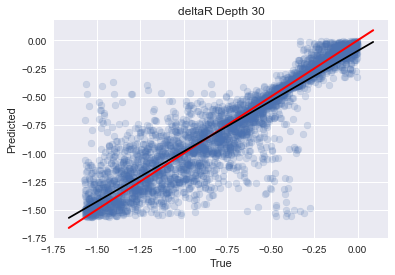

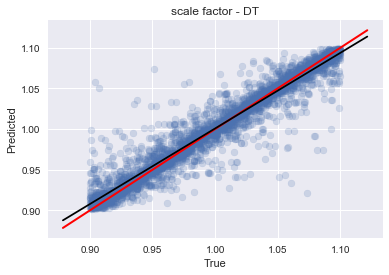

In [24]:
#Initialize the model
regr_DT = DecisionTreeRegressor(max_depth=60, min_samples_leaf = 2)

#Fit the model
regr_DT.fit(X_train, Y_train)


#Print the coefficients or importances

data1 = pd.DataFrame(regr_DT.feature_importances_.T, columns = ['Regr - DT']) 

data1.index = X_train.columns

#print(data1[data1['Regr - DT']>0.001])


#Use model to predict
y_pred_DT = regr_DT.predict(X_test)

#Plot results
plotSummary(Y_test['deltaI'], y_pred_DT[:,0], 'deltaI Depth 30')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], y_pred_DT[:,1], 'deltaR Depth 30')
#myResiduals(Y_test['deltaR'], y_3[:,1])
plotSummary(Y_test['scale_factor'], y_pred_DT[:,2], 'scale factor - DT')

print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT.score(X_test,Y_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X, Y, cv=10))

## Random Forest


Score - Random Forest: 0.8993279417370635 for delta I/R 10
 
RMSE on test data: 0.10148115573984134 for  deltaI 10
R^2 Score on test data: 0.8738815183755473 for deltaI 10
 
RMSE on test data: 0.13793519951058517 for  deltaR 10
R^2 Score on test data: 0.908009578234853 for deltaR 10
 
RMSE on test data: 0.007351974954224051 for  Scale Factor
R^2 Score on test data: 0.9838207861431069 for Scale Factor


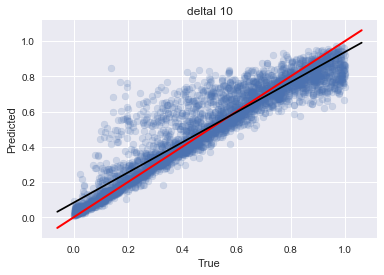

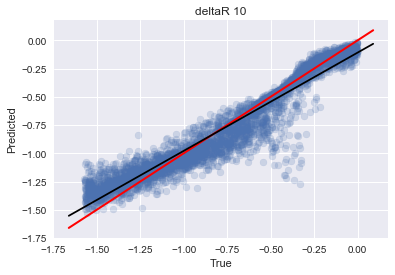

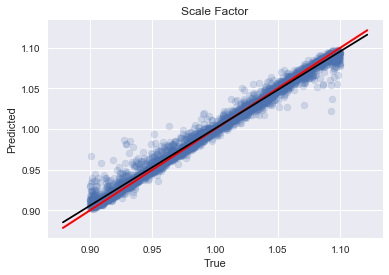

In [23]:
rs = 42
regr_RF = RandomForestRegressor(max_depth = 40, n_estimators = 30, random_state=rs)

model_RF = regr_RF.fit(X_train, Y_train)

predict_RF = model_RF.predict(X_test)


importance_RF_10 = pd.Series(model_RF.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , model_RF.score(X_test, Y_test), 'for delta I/R 10')

plotSummary(Y_test['deltaI'], predict_RF[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predict_RF[:,1], 'deltaR 10')
plotSummary(Y_test['scale_factor'], predict_RF[:,2], 'Scale Factor')


## AdaBoost Random Forest

 
RMSE on test data: 0.08239214789435773 for  AdaBoost Delta I
R^2 Score on test data: 0.9168658283846048 for AdaBoost Delta I
 
RMSE on test data: 0.12930167513809007 for  AdaBoost Delta R
R^2 Score on test data: 0.9191647663568101 for AdaBoost Delta R
 
RMSE on test data: 0.0029615996072894905 for  AdaBoost Scale Factor
R^2 Score on test data: 0.9973745601948886 for AdaBoost Scale Factor
Delta I AdaBoost Score: 0.9168658283846048
Delta R AdaBoost Score: 0.9191647663568101
Scale Factor AdaBoost Score: 0.9973745601948885


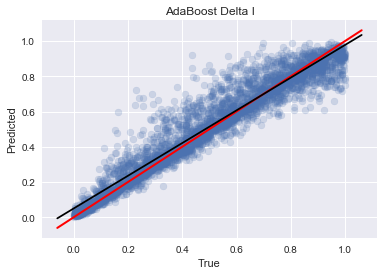

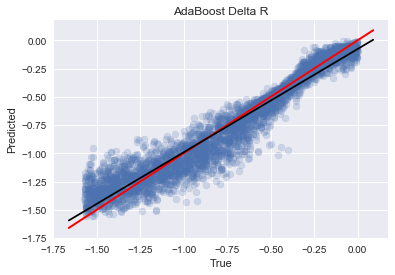

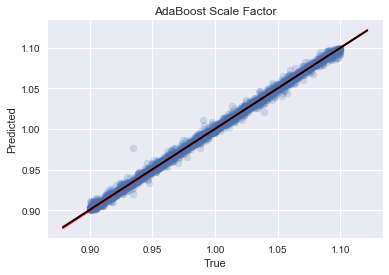

In [25]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 30
nest2 = 15

regr_AB = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)
regr_AB_sf = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators = nest2, random_state = rng)

model_AB = regr_AB.fit(X_train, Y_train['deltaI'])
model_AB_R = regr_ABR.fit(X_train, Y_train['deltaR'])
model_AB_sf = regr_AB_sf.fit(X_train, Y_train['scale_factor'])

y_pred_AB1 = model_AB.predict(X_test)
y_pred_AB1_R = model_AB_R.predict(X_test)
y_pred_AB1_sf = model_AB_sf.predict(X_test)


plotSummary(Y_test['deltaI'], y_pred_AB1, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_AB1_R, 'AdaBoost Delta R')
plotSummary(Y_test['scale_factor'], y_pred_AB1_sf, 'AdaBoost Scale Factor')

print('Delta I AdaBoost Score:', model_AB.score(X_test, Y_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_R.score(X_test, Y_test['deltaR']))
print('Scale Factor AdaBoost Score:', model_AB_sf.score(X_test, Y_test['scale_factor']))



## Gradient Boosting Random Forest

 
RMSE on test data: 0.10873854969916283 for  GradientBoost Delta I
R^2 Score on test data: 0.8551978544672958 for GradientBoost Delta I
 
RMSE on test data: 0.1744850463469695 for  GradientBoost Delta R
R^2 Score on test data: 0.8527996571368353 for GradientBoost Delta R
 
RMSE on test data: 0.004463504170934148 for  GradientBoost Scale Factor
R^2 Score on test data: 0.9940364993947892 for GradientBoost Scale Factor
Delta I Gradient Boost Score: 0.8551978544672958
Delta R Gradient Boost Score: 0.8527996571368353
Scale Factor Gradient Boost Score: 0.9940364993947892


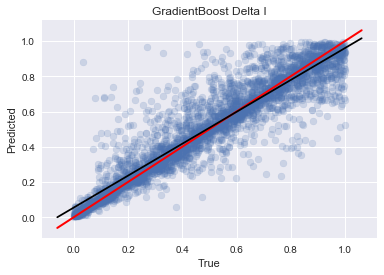

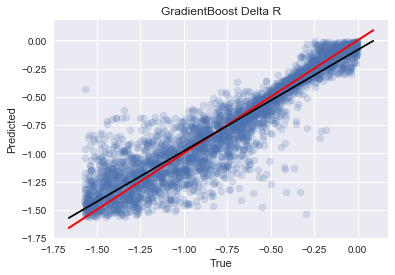

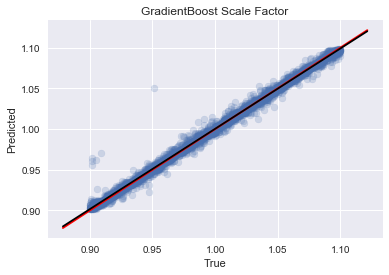

In [26]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 50
nest2 = 50


regr_GB = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GBR = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GB_sf = GradientBoostingRegressor(max_depth = md, n_estimators = nest2, random_state = rng)

model_GB = regr_GB.fit(X_train, Y_train['deltaI'])
model_GB_R = regr_GBR.fit(X_train, Y_train['deltaR'])
model_GB_sf = regr_GB_sf.fit(X_train, Y_train['scale_factor'])

y_pred_GB1 = model_GB.predict(X_test)
y_pred_GB1_R = model_GB_R.predict(X_test)
y_pred_GB1_sf = model_GB_sf.predict(X_test)

plotSummary(Y_test['deltaI'], y_pred_GB1, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_GB1_R, 'GradientBoost Delta R')
plotSummary(Y_test['scale_factor'], y_pred_GB1_sf, 'GradientBoost Scale Factor')

print('Delta I Gradient Boost Score:', model_GB.score(X_test, Y_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_R.score(X_test, Y_test['deltaR']))
print('Scale Factor Gradient Boost Score:', model_GB_sf.score(X_test, Y_test['scale_factor']))

## Testing the Models on the Experimental Data



In [18]:
# Load the experimental data
exp_data = pd.read_csv('HexagonExperimentalData053118_v2.csv', header = None, names = energy_names)

pred_phase_OLS_R = results_OLS_R.predict(exp_data)
pred_phase_OLS_I = results_OLS_I.predict(exp_data)

pred_phase_DT = regr_DT.predict(exp_data)

pred_phase_RF = regr_RF.predict(exp_data)

pred_phase_AB_R = model_AB_R.predict(exp_data)
pred_phase_AB_I = model_AB.predict(exp_data)

pred_phase_GB_I = model_GB.predict(exp_data)
pred_phase_GB_R = model_GB_R.predict(exp_data)

predictedPhases = pd.DataFrame(pred_phase_DT, columns = ['deltaI', 'deltaR'], index = ['Decision Tree'])

predictedPhases.loc['OLS'] = (pred_phase_OLS_I[0], pred_phase_OLS_R[0])
predictedPhases.loc['Random Forest'] = pred_phase_RF[0]
predictedPhases.loc['AdaBoost'] = (pred_phase_AB_I[0], pred_phase_AB_R[0])
predictedPhases.loc['Gradient Boosting'] = (pred_phase_GB_I[0], pred_phase_GB_R[0])


predictedPhases

,deltaI,deltaR
Decision Tree,0.153855,-0.029924
OLS,-82.894389,262.453490
Random Forest,0.395841,-0.103680
AdaBoost,0.203800,-0.007671
Gradient Boosting,0.160009,-0.011668


In [19]:
exp_data

,E_-250_mV,E_-248_mV,E_-245_mV,E_-242_mV,E_-240_mV,E_-238_mV,E_-235_mV,E_-232_mV,E_-230_mV,E_-228_mV,...,E_228_mV,E_230_mV,E_232_mV,E_235_mV,E_238_mV,E_240_mV,E_242_mV,E_245_mV,E_248_mV,E_250_mV
0,1.7875,1.8668,1.9093,1.925,1.8818,1.7855,1.6552,1.5261,1.3979,1.272,...,0.92348,0.92194,0.9133,0.91176,0.90893,0.91575,0.92062,0.9293,0.93353,0.92967


## Dimensional Analysis 
This code takes awhile to run because of the for loops

### Decision Tree Dim. Analysis

In [ ]:
#Determining optimal max_depth - should be at the bend 
rmse_test = []
R2_test = []
for i in range(1,60):
    
    regressor_test = DecisionTreeRegressor(max_depth=i, min_samples_leaf=5)
    regressor_test = regressor_test.fit(X_train, Y_train)
    true = Y_test
    predicted = regressor_test.predict(X_test)

    rmse_test.append(np.sqrt(mean_squared_error(true, predicted)))
    R2_test.append(r2_score(true, predicted))
    

index1 = [i for i in range(1,60)]
plt.plot(index1, rmse_test)

figure()
plt.plot(index1, R2_test)

### Random Forest Dim. Analysis

In [ ]:
#Determining optimal max_depth - should be at the bend 
test_range = 20
rmse_test = np.zeros(shape = (test_range-1, test_range-1))
R2_test = np.zeros(shape = (test_range-1, test_range-1))

k = 0
for i in range(1,test_range):
    for j in range(1,test_range):
        
    
        regressor_test = RandomForestRegressor(max_depth=i,n_estimators = j, min_samples_leaf=5)
        regressor_test = regressor_test.fit(X_train, Y_train)
        true = Y_test
        predicted = regressor_test.predict(X_test)
        
        np.put(rmse_test, k, np.sqrt(mean_squared_error(true, predicted)))
        np.put(R2_test, k, r2_score(true, predicted))
        
        k += 1
    

index1 = [i for i in range(1,test_range)]
index2 = [j for j in range(1,test_range)]
plt.plot(index1, rmse_test)

figure()
plt.plot(index1, R2_test)

In [ ]:
figure()
ax = sns.heatmap(rmse_test, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees');
figure()
ax1 = sns.heatmap(R2_test, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees');



### AdaBoost Random Forest Dim. Analysis

In [ ]:
#Determining optimal max_depth - should be at the bend 
test_range = 20
rmse_test_AB_I = np.zeros(shape = (test_range-1, test_range-1))
R2_test_AB_I = np.zeros(shape = (test_range-1, test_range-1))

rmse_test_AB_R = np.zeros(shape = (test_range-1, test_range-1))
R2_test_AB_R = np.zeros(shape = (test_range-1, test_range-1))

k = 0
for i in range(1,test_range):
    for j in range(1,test_range):
        
    
        regressor_test_AB_I = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i),n_estimators = j,random_state=rng)
        regressor_test_AB_R = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i),n_estimators = j,random_state=rng)

        regressor_test_AB_I = regressor_test_AB_I.fit(X_train, Y_train['deltaI'])
        regressor_test_AB_R = regressor_test_AB_R.fit(X_train, Y_train['deltaR'])
        
        true_I = Y_test['deltaI']
        true_R = Y_test['deltaR']
        predicted_I = regressor_test_AB_I.predict(X_test)
        predicted_R = regressor_test_AB_R.predict(X_test)
        
        np.put(rmse_test_AB_I, k, np.sqrt(mean_squared_error(true_I, predicted_I)))
        np.put(R2_test_AB_I, k, r2_score(true_I, predicted_I))
        
        np.put(rmse_test_AB_R, k, np.sqrt(mean_squared_error(true_R, predicted_R)))
        np.put(R2_test_AB_R, k, r2_score(true_R, predicted_R))
        
        k += 1
    

index1 = [i for i in range(1,test_range)]
index2 = [j for j in range(1,test_range)]
#plt.plot(index1, rmse_test_AB)

#figure()
#plt.plot(index1, R2_test_AB)



In [ ]:
figure()
ax = sns.heatmap(rmse_test_AB_I, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for AdaBoost Delta I");

figure()
ax = sns.heatmap(rmse_test_AB_R, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for AdaBoost Delta R");

figure()
ax1 = sns.heatmap(R2_test_AB_I, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for AdaBoost Delta I");

figure()
ax1 = sns.heatmap(R2_test_AB_R, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for AdaBoost Delta R");

### Gradient Boosting Random Forest

In [ ]:
#Determining optimal max_depth - should be at the bend 
test_range = 40
test_range_1 = 20
rmse_test_GB_I = np.zeros(shape = (test_range-1, test_range-1))
R2_test_GB_I = np.zeros(shape = (test_range-1, test_range-1))

rmse_test_GB_R = np.zeros(shape = (test_range-1, test_range-1))
R2_test_GB_R = np.zeros(shape = (test_range-1, test_range-1))

k = 0
for i in range(1,test_range_1):
    for j in range(15,test_range):
        
    
        regressor_test_GB_I = GradientBoostingRegressor(max_depth=i,n_estimators = j,random_state=rng)
        regressor_test_GB_R = GradientBoostingRegressor(max_depth=i,n_estimators = j,random_state=rng)

        regressor_test_GB_I = regressor_test_GB_I.fit(X_train, Y_train['deltaI'])
        regressor_test_GB_R = regressor_test_GB_R.fit(X_train, Y_train['deltaR'])
        
        true_I = Y_test['deltaI']
        true_R = Y_test['deltaR']
        predicted_GBI = regressor_test_GB_I.predict(X_test)
        predicted_GBR = regressor_test_GB_R.predict(X_test)
        
        np.put(rmse_test_GB_I, k, np.sqrt(mean_squared_error(true_I, predicted_GBI)))
        np.put(R2_test_GB_I, k, r2_score(true_I, predicted_GBI))
        
        np.put(rmse_test_GB_R, k, np.sqrt(mean_squared_error(true_R, predicted_GBR)))
        np.put(R2_test_GB_R, k, r2_score(true_R, predicted_GBR))
        print (i, j)
        
        k += 1
    

index1 = [i for i in range(1,test_range)]
index2 = [j for j in range(1,test_range)]
#plt.plot(index1, rmse_test_AB)

#figure()
#plt.plot(index1, R2_test_AB)

In [ ]:
index2 = [j for j in range(15,test_range)]

figure()
ax = sns.heatmap(rmse_test_GB_I, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for Gradient Boosting Delta I", xticklabels = index2, yticklabels = index1);

figure()
ax = sns.heatmap(rmse_test_GB_R, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for Gradient Boosting Delta R", xticklabels = index2, yticklabels = index1);

figure()
ax1 = sns.heatmap(R2_test_GB_I, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for Gradient Boosting Delta I", xticklabels = index2, yticklabels = index1);

figure()
ax1 = sns.heatmap(R2_test_GB_R, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for Gradient Boosting Delta R", xticklabels = index2, yticklabels = index1);